##Assignment‑2: Basic Data Pre‑Processing (UCI Dataset)

###🔹 Step 1: Import Libraries


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
print('Libraries imported.')


Libraries imported.


###🔹 Step 2: Load Dataset from UCI

In [25]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
columns = ['sepal_length','sepal_width','petal_length','petal_width','class']
df = pd.read_csv(url, names=columns)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


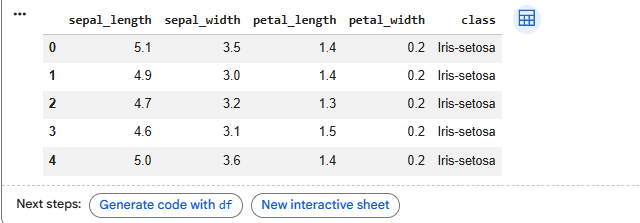

###🔹 Step 3: Dataset Overview

In [26]:

print('Shape:', df.shape)
print('\nColumn Names:', df.columns.tolist())
df.head()

Shape: (150, 5)

Column Names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


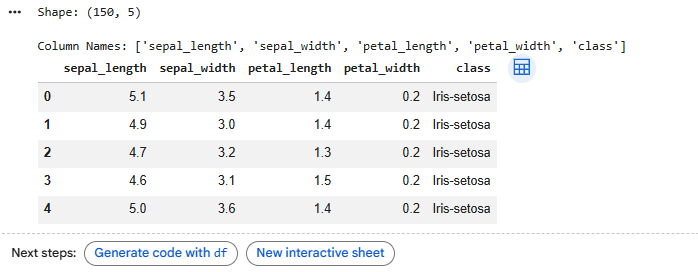

###🔹 Step 4: Data Types & Summary

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


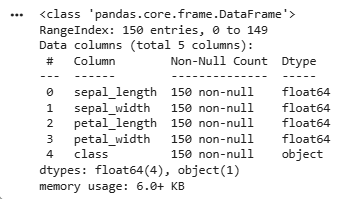

In [28]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


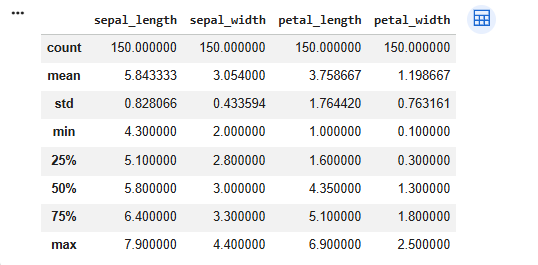

###🔹 Step 5: Check Missing Values

In [29]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
class,0


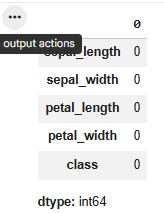

###🔹 Step 6: Handle Missing Values (if found)

In [30]:
# Example strategy: fill numeric columns with mean
for col in df.select_dtypes(include=['float64','int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()

/tmp/ipython-input-1648347935.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-1648347935.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
class,0


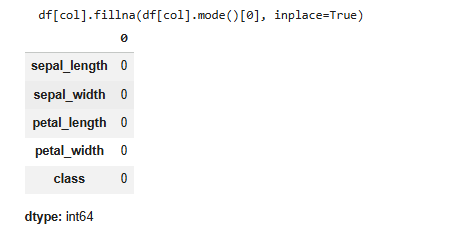

###🔹 Step 7: Remove Duplicate Records

In [31]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print('Duplicates removed:', before - after)

Duplicates removed: 3


###🔹 Step 8: Encode Categorical Column

In [32]:
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])
df.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


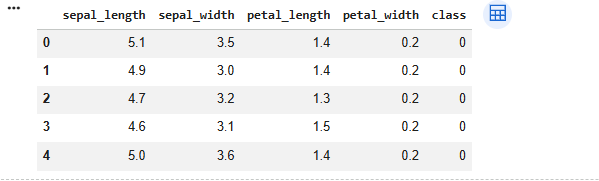

###🔹 Step 9: Feature Scaling

In [33]:
scaler = StandardScaler()
cols = ['sepal_length','sepal_width','petal_length','petal_width']
df[cols] = scaler.fit_transform(df[cols])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,-0.915509,1.019971,-1.357737,-1.3357,0
1,-1.157560,-0.128082,-1.357737,-1.3357,0
2,-1.399610,0.331139,-1.414778,-1.3357,0
3,-1.520635,0.101529,-1.300696,-1.3357,0
4,-1.036535,1.249582,-1.357737,-1.3357,0


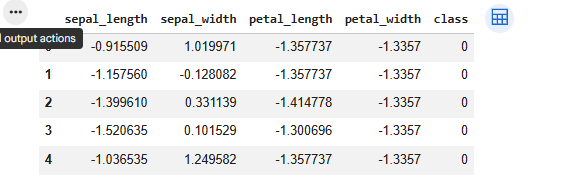

###🔹 Step 10: Save Final Dataset

In [34]:
df.to_csv('assignment2_cleaned_iris.csv', index=False)
print('Saved: assignment2_cleaned_iris.csv')

Saved: assignment2_cleaned_iris.csv


###Conclusion

This assignment focused on data preprocessing to make the dataset suitable for machine learning. Data cleaning, handling missing values, and feature scaling were performed to improve data quality and consistency. The final processed dataset is now well-prepared for effective model training and analysis.